# **Ridge & Lasso Regression - Practical Implementation**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading dataset
data_path = '/content/housing.csv'
df = pd.read_csv(data_path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Train Test Split**

In [3]:
# importing train test split
from sklearn.model_selection import train_test_split

In [24]:
# splitting
X = df.drop('MEDV', axis=1)
y = df[['MEDV']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Standardization**

In [7]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

In [26]:
# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Ridge Regression - Implementation**

In [12]:
# importing ridge regression
from sklearn.linear_model import Ridge

# importing gridsearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [27]:
ridge_reg = Ridge()

In [28]:
parameters = {'alpha': [1, 2, 5, 10, 11, 13, 15, 17, 20, 30, 40, 50, 60, 70, 80, 90]}
ridge_cv = GridSearchCV(ridge_reg, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 11, 13, 15, 17, 20, 30, 40, 50,
                                   60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [29]:
# best parameter
ridge_cv.best_params_

{'alpha': 13}

In [30]:
# best score
ridge_cv.best_score_

-25.799922153974773

**Testing**

In [31]:
ridge_pred = ridge_cv.predict(X_test)
ridge_pred

array([[28.35067558],
       [35.97215347],
       [16.30660974],
       [25.28437853],
       [18.80039345],
       [23.12602367],
       [17.67507615],
       [14.45541725],
       [22.41989482],
       [20.80141669],
       [24.63431979],
       [18.99483256],
       [-6.05616528],
       [21.99258956],
       [19.3383872 ],
       [25.77152808],
       [19.46334032],
       [ 5.73188649],
       [39.75257487],
       [17.56755586],
       [27.08367833],
       [29.54231044],
       [11.57544736],
       [24.12829091],
       [17.93078206],
       [15.4979455 ],
       [23.11811197],
       [14.80033445],
       [22.46764916],
       [19.59497653],
       [21.93943783],
       [25.21487131],
       [25.08319764],
       [18.33352637],
       [16.27740518],
       [18.04676124],
       [30.95255104],
       [20.34797658],
       [24.07957656],
       [24.81937676],
       [14.333128  ],
       [30.98007074],
       [41.45720818],
       [18.06943158],
       [26.99986827],
       [16

In [20]:
# importing seaborn
import seaborn as sns

<ipython-input-32-0861067cb753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_pred - y_test)


<Axes: ylabel='Density'>

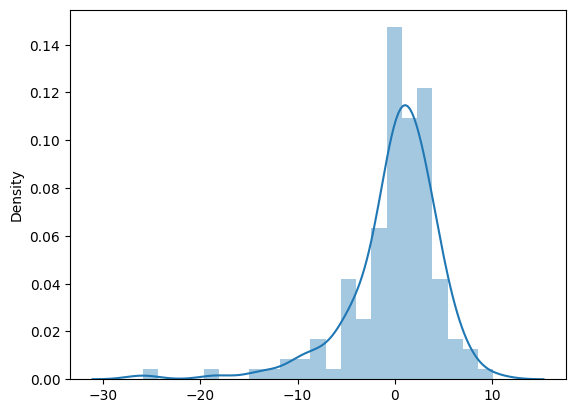

In [32]:
sns.distplot(ridge_pred - y_test)

In [33]:
# importing metrics
from sklearn.metrics import r2_score

In [34]:
r2_score(ridge_pred, y_test)

0.6409280146646225

## **Lasso Regression - Implementation**

In [35]:
# importing Lasso regression
from sklearn.linear_model import Lasso

**Training**

In [36]:
lasso = Lasso()

In [73]:
parameters = {'alpha': [0.1, 0.2, 0.3, 0.5, 0.5, 0.6, 0.7, 0.8, 1, 2, 5, 10, 11, 13, 15, 17, 20, 30, 40, 50, 60, 70, 80, 90]}
lasso_cv = GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.5, 0.5, 0.6, 0.7, 0.8, 1, 2,
                                   5, 10, 11, 13, 15, 17, 20, 30, 40, 50, 60,
                                   70, 80, 90]},
             scoring='neg_mean_squared_error')

In [74]:
# best parameter
lasso_cv.best_params_

{'alpha': 0.1}

In [75]:
# best score
lasso_cv.best_score_

-26.311283944007233

**Testing**

In [80]:
lasso_pred = lasso_cv.predict(X_test)
lasso_pred

array([28.30454921, 35.22413416, 17.93540317, 25.22287596, 18.66599226,
       23.5094161 , 17.69526823, 14.62772267, 22.27994103, 20.94619939,
       24.08275162, 19.26528138, -5.78979803, 22.36784894, 19.40411329,
       25.58285661, 18.74886961,  5.2553499 , 39.07787944, 17.51449857,
       26.50243284, 28.82989478, 11.6932904 , 24.27344892, 17.87117884,
       15.26584263, 23.35214471, 15.12068329, 22.20477408, 19.7366091 ,
       21.70290304, 25.26296823, 25.24466174, 18.37085373, 15.94007698,
       18.56707694, 31.29590517, 20.1172839 , 23.73947428, 24.71420225,
       14.2496409 , 30.09994959, 40.36965197, 18.27713667, 27.08667965,
       16.79745535, 14.4166508 , 25.9628523 , 19.68908612, 30.70401416,
       21.89360459, 33.15686589, 16.27266484, 26.67253309, 38.42916843,
       22.56328833, 18.80339059, 31.31319251, 24.8676406 , 13.58530245,
       22.91084255, 29.93185896, 30.70685324, 16.61851266, 23.3208423 ,
       16.40086336, 20.03721265, 25.85376445, 29.80381562, 12.26

<ipython-input-79-1136067b690c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_pred.reshape(len(lasso_pred), 1) - y_test)


<Axes: ylabel='Density'>

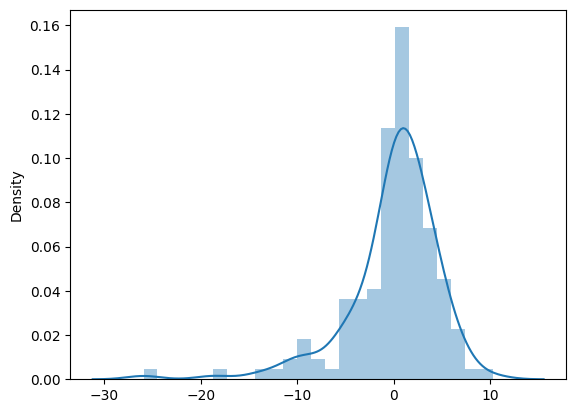

In [79]:
sns.distplot(lasso_pred.reshape(len(lasso_pred), 1) - y_test)

In [81]:
r2_score(lasso_pred, y_test)

0.6112904348716802